In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch import nn
import torch.nn.functional as F

import numpy as np
import os
from PIL import Image
from collections import OrderedDict
from generator import Generator
import torchvision.transforms as transforms

In [24]:
g = torch.load("checkpoints/g_87.pt", map_location=torch.device('cpu'))
g.eval()

Generator(
  (encode0): Sequential(
    (pad): _SamePad()
    (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2))
    (relu): LeakyReLU(negative_slope=0.2)
    (batchnorm): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  )
  (encode1): _EncoderBlock(
    (pre_conv): Sequential(
      (pad): _SamePad()
      (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2))
    )
    (conv0): Sequential(
      (pad): _SamePad()
      (conv): Conv2d(65, 64, kernel_size=(3, 3), stride=(1, 1))
      (relu): LeakyReLU(negative_slope=0.2)
      (batchnorm): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    )
    (conv1): Sequential(
      (pad): _SamePad()
      (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
      (relu): LeakyReLU(negative_slope=0.2)
      (batchnorm): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    )
    (conv2): Sequential(
      (pad): _SamePad()
      (conv):

In [8]:
raw_data = np.load("datasets/omniglot_data.npy")

In [13]:
display_transform = transforms.Compose([
     transforms.ToPILImage(),
     transforms.Resize(g.dim),
     transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))
])

In [22]:
def render_img(arr):
    arr = (arr * 0.5) + 0.5
    arr = np.uint8(arr * 255)
    display(Image.fromarray(arr, mode='L').resize((224, 224)))

def display_generations(self, data_loader):
    train_idx = torch.randint(0, len(data_loader.dataset), (1,))[0]
    train_img = display_transform(data_loader.dataset.x1_examples[train_idx])
    self.render_img(train_img[0])

    z = torch.randn((1, self.g.z_dim)).to(self.device)
    inp = train_img.unsqueeze(0).to(self.device)
    train_gen = self.g(inp, z).cpu()[0]
    self.render_img(train_gen[0])

In [25]:
z = torch.randn((1, g.z_dim))

In [47]:
i = 301
j = 0

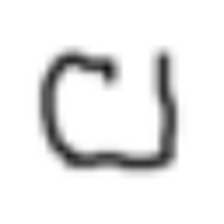

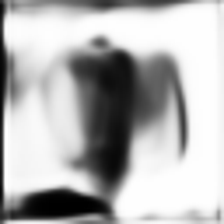

In [48]:
raw_inp = raw_data[i][j]
inp = display_transform(raw_inp)
with torch.no_grad():
    res = g(inp.unsqueeze(0), z)[0]
render_img(inp[0])
render_img(res[0])

In [6]:
inp = np.array([raw_data[1200][0]], dtype="float64")

In [7]:
torch_g = Generator(dim=28, channels=1)
torch_g.eval()

Generator(
  (encode0): Sequential(
    (pad): _SamePad()
    (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2))
    (relu): LeakyReLU(negative_slope=0.2)
    (batchnorm): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  )
  (encode1): _EncoderBlock(
    (pre_conv): Sequential(
      (pad): _SamePad()
      (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2))
    )
    (conv0): Sequential(
      (pad): _SamePad()
      (conv): Conv2d(65, 64, kernel_size=(3, 3), stride=(1, 1))
      (relu): LeakyReLU(negative_slope=0.2)
      (batchnorm): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    )
    (conv1): Sequential(
      (pad): _SamePad()
      (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
      (relu): LeakyReLU(negative_slope=0.2)
      (batchnorm): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    )
    (conv2): Sequential(
      (pad): _SamePad()
      (conv):

In [10]:
input_images = torch.ones((32, 1, 28, 28))
z = torch.randn((32, 100))

In [70]:
from discriminator import create_d

In [72]:
create_d(28)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(56, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (relu0): LeakyReLU(negative_slope=0.2)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (relu1): LeakyReLU(negative_slope=0.2)
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (relu2): LeakyReLU(negative_slope=0.2)
        (conv2): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): InstanceNorm2d(80, eps=1e-05, momentum=0.1, affine

In [31]:
torch_g.sample(input_images).shape

torch.Size([32, 1, 28, 28])

In [ ]:
torch_inp = torch.tensor(inp).transpose(1, 3).transpose(2, 3).float()
torch_out = torch_g(torch_inp, torch.tensor(z).float())
torch_out[0][0][0]

In [ ]:
def render_image_arr(arr):
    arr = np.uint8(arr * 256)
    arr = arr.reshape(arr.shape[:-1])
    display(Image.fromarray(arr, mode='L').resize((224, 224)))
    
def render_torch(arr):
    arr = np.uint8(arr * 256)
    display(Image.fromarray(arr, mode='L').resize((224, 224)))

In [ ]:
# Render torch
refined_torch_out = torch_out.detach().numpy() * 0.5 + 0.5

render_torch(refined_torch_out[0][0])

In [ ]:
from torchvision.models.densenet import DenseNet
net = DenseNet(growth_rate=16, block_config=(3,3,3,3), num_classes=10, drop_rate=0.0)
net

In [ ]:
def convert_bn(net):
    for name in net._modules.keys():
        if "norm" in name:
            net._modules[name] = nn.Identity()
        else:
            convert_bn(net._modules[name])

In [ ]:
convert_bn(net)
net

In [54]:
mod = nn.BatchNorm2d(64, affine=True)

In [64]:
import tensorflow as tf

In [ ]:
a = tf.constant(0.)
b = 2 * a
g = tf.gradients(a + b, [a, b], stop_gradients=[a, b])


In [6]:
norm = nn.InstanceNorm1d(3, affine=True, track_running_stats=False)

In [7]:
tensor = torch.zeros((1, 3, 5, 5))
for i in range(3):
    tensor[0][i] = torch.randn((5, 5)) + i

In [8]:
norm(tensor)

ValueError: expected 3D input (got 4D input)

In [17]:
tensor

tensor([[[[-0.2375,  0.9305,  1.4677,  0.1904,  2.1872],
          [ 1.1405,  0.1877, -0.2945, -1.8864, -0.8841],
          [-1.9455,  1.5563,  1.7558, -0.5022, -0.2945],
          [-0.0302, -0.1682,  1.5877,  1.6745, -0.8496],
          [ 0.1775,  0.2997,  2.0681,  0.9333, -0.7345]],

         [[ 2.0193,  0.9958,  2.0291,  0.1691,  0.7073],
          [ 1.1761,  1.0602,  0.8592,  0.7109,  0.4420],
          [ 1.3823,  2.0038,  0.9473,  0.3570,  1.9287],
          [ 0.4505,  2.2994,  0.7116,  2.1269, -0.8457],
          [-0.5620,  2.2178,  0.5716,  0.3277,  1.9907]],

         [[ 3.8420,  0.8646,  2.5898,  2.0150,  1.1855],
          [ 1.9689,  1.1003,  1.8354,  1.3174,  1.2613],
          [ 4.2256,  2.5718,  1.5704,  1.7245,  0.9842],
          [ 2.0691, -0.0515,  1.2107,  3.6537,  1.2279],
          [ 0.5973,  2.1711,  1.0104,  2.9567,  1.1152]]]])

In [20]:
[tensor[0][i].mean() for i in range(3)]

[tensor(0.3332), tensor(1.0431), tensor(1.8007)]

In [21]:
[norm(tensor)[0][i].mean() for i in range(3)]

[tensor(-2.8610e-08, grad_fn=<MeanBackward0>),
 tensor(-7.1526e-08, grad_fn=<MeanBackward0>),
 tensor(0., grad_fn=<MeanBackward0>)]

In [50]:
class Layer(nn.Module):
    def __init__(self):
        super().__init__()
        self.gamma = torch.nn.Parameter(torch.tensor(range(5)).float().unsqueeze(-1).unsqueeze(-1), requires_grad=True)
        self.beta = torch.nn.Parameter(torch.tensor([0] * 5).float().unsqueeze(-1).unsqueeze(-1), requires_grad=True)
    
    def forward(self, x):
        mid = x * self.gamma + self.beta
        print(mid)
        return mid.mean()

In [51]:
xx = torch.autograd.Variable(torch.ones((5,2,2)), requires_grad = True)
l = Layer()

In [53]:
result = l(xx)

tensor([[[0., 0.],
         [0., 0.]],

        [[1., 1.],
         [1., 1.]],

        [[2., 2.],
         [2., 2.]],

        [[3., 3.],
         [3., 3.]],

        [[4., 4.],
         [4., 4.]]], grad_fn=<AddBackward0>)


In [54]:
result.backward()

In [55]:
l.beta.grad

tensor([[[0.2000]],

        [[0.2000]],

        [[0.2000]],

        [[0.2000]],

        [[0.2000]]])